#### **In this we extracted hog features**

In [5]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

In [6]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [34]:
import cv2
import numpy as np
img = "/home/yaadava_kishore/Desktop/Data_Analytics_1_b/Fruit-Images-Dataset/Training/Apple Braeburn/0_100.jpg"


def hog(img):
    # Read image
    img = cv2.imread(img)
    # print(img.shape)
    img = np.float32(img) / 255.0

    # Calculate gradient
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    # print(mag.shape, angle.shape)
    mag, angle = np.array(mag).flatten(), np.array(angle).flatten()
    final_arr = mag+angle
    return final_arr


hog(img)


def test_hog(img):
    # Read image
    img = cv2.imread(img)
    # print(img.shape)
    img = np.float32(img) / 255.0

    # Calculate gradient
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    # print(mag.shape, angle.shape)
    mag, angle = np.array(mag).flatten(), np.array(angle).flatten()
    final_arr = mag+angle
    final_arr = np.mean(final_arr)/np.max(final_arr)
    return final_arr


hog(img)


# len(hog(img))

# def openHOG(img):
#     hog = cv2.HOGDescriptor()
#     img = cv2.imread(img)
#     h = hog.compute(img)
#     return h
# print(openHOG(img).shape)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('puppy.jpeg')
imshow(img)
print(img.shape)


In [15]:
folder_url = "/home/yaadava_kishore/Desktop/Data_Analytics_1_b/Fruit-Images-Dataset/Training"
files_list = {}
for i in os.listdir(folder_url):
    files_list[f"{os.path.join(folder_url,i)}"] = os.listdir(os.path.join(folder_url,i))
# print(files_list)

In [16]:
flatten = {}
for dir_path, files in files_list.items():
    img_arr = np.zeros(30000)
    for file in files:
        # img = cv2.imread(os.path.join(dir_path, file))
        img_arr += hog(os.path.join(dir_path, file))
    flatten[dir_path.split("/")[-1]] = img_arr


In [19]:
final_arr = {}
# for cat,arr in flatten.items():
#     final_arr[cat]=np.array(arr).mean()
for cat, arr in flatten.items():
    max = np.max(arr)
    arr = arr/max
    final_arr[cat] = arr.mean()


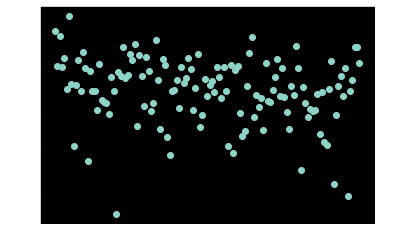

In [20]:
import matplotlib.pyplot as plt
# list(final_arr.values()).hist()
plt.scatter(final_arr.keys(), final_arr.values())
# plt.scatter(flatten.keys(), flatten.values())


#### **Testing**

In [21]:
test_folder_url = "/home/yaadava_kishore/Desktop/Data_Analytics_1_b/Fruit-Images-Dataset/Test"
test_files_list = {}
for i in os.listdir(test_folder_url):
    test_files_list[f"{os.path.join(test_folder_url,i)}"] = os.listdir(os.path.join(test_folder_url,i))

In [35]:
flatten_test = {}
for dir_path, files in test_files_list.items():
    img_arr_test = np.zeros(30000)
    for file in files:
        # img = cv2.imread(os.path.join(dir_path, file))
        img_arr_test += test_hog(os.path.join(dir_path, file))
    flatten_test[dir_path.split("/")[-1]] = img_arr_test

flatten_test = {}
for dir_path, files in test_files_list.items():
    img_arr_test = []
    for file in files:
        # img = cv2.imread(os.path.join(dir_path, file))
        # img_arr_test.append(extract_color_histogram(img).mean())
        img_arr_test.append(test_hog(os.path.join(dir_path, file)))
    flatten_test[dir_path.split("/")[-1]] = img_arr_test

In [38]:
comp = np.round(list(final_arr.values()), decimals=3)
fold = np.array(list(final_arr.keys()))
values_arr=[]
for i,j in zip(fold,comp):
    values_arr.append((i,j))
values_arr

[('Cauliflower', 0.616),
 ('Apple Granny Smith', 0.548),
 ('Rambutan', 0.605),
 ('Cherry Rainier', 0.547),
 ('Nectarine', 0.564),
 ('Kaki', 0.505),
 ('Raspberry', 0.642),
 ('Pomegranate', 0.516),
 ('Nut Pecan', 0.399),
 ('Nectarine Flat', 0.513),
 ('Cocos', 0.56),
 ('Onion Red Peeled', 0.503),
 ('Onion White', 0.575),
 ('Papaya', 0.545),
 ('Cucumber Ripe 2', 0.372),
 ('Apple Golden 2', 0.541),
 ('Tomato 4', 0.503),
 ('Kiwi', 0.503),
 ('Pepino', 0.466),
 ('Quince', 0.553),
 ('Kumquats', 0.486),
 ('Apple Red Delicious', 0.481),
 ('Passion Fruit', 0.479),
 ('Cherry 1', 0.46),
 ('Pear Red', 0.528),
 ('Pomelo Sweetie', 0.502),
 ('Corn Husk', 0.272),
 ('Plum 3', 0.537),
 ('Grape Pink', 0.531),
 ('Kohlrabi', 0.585),
 ('Apple Red 3', 0.526),
 ('Apple Red 2', 0.532),
 ('Mangostan', 0.571),
 ('Tomato not Ripened', 0.561),
 ('Pineapple Mini', 0.589),
 ('Ginger Root', 0.437),
 ('Strawberry Wedge', 0.569),
 ('Chestnut', 0.53),
 ('Blueberry', 0.474),
 ('Limes', 0.565),
 ('Apple Pink Lady', 0.54),
 (

In [36]:
fla={}
comp = np.round(list(final_arr.values()), decimals=3)
fold = np.array(list(final_arr.keys()))
for cat, vals in flatten_test.items():
    predicted = []
    np.round_(vals, decimals=3)
    for val in vals:
        idx = np.argmin(np.abs(comp-val))
        predicted.append(fold[idx])
    fla[cat] = predicted


In [37]:
from collections import Counter
for cat, val in fla.items():
    print("total test_samples", len(val), " of ", cat)
    myCounter = Counter(val)
    x = list(myCounter.items())
    print("main category: ", cat, ", total_different_types: ",
          len(x), ", correctly_predicted: ", myCounter[cat])
    # break


total test_samples 234  of  Cauliflower
main category:  Cauliflower , total_different_types:  14 , correctly_predicted:  0
total test_samples 164  of  Apple Granny Smith
main category:  Apple Granny Smith , total_different_types:  11 , correctly_predicted:  0
total test_samples 164  of  Rambutan
main category:  Rambutan , total_different_types:  9 , correctly_predicted:  0
total test_samples 246  of  Cherry Rainier
main category:  Cherry Rainier , total_different_types:  28 , correctly_predicted:  0
total test_samples 164  of  Nectarine
main category:  Nectarine , total_different_types:  11 , correctly_predicted:  0
total test_samples 166  of  Kaki
main category:  Kaki , total_different_types:  10 , correctly_predicted:  0
total test_samples 166  of  Raspberry
main category:  Raspberry , total_different_types:  16 , correctly_predicted:  0
total test_samples 164  of  Pomegranate
main category:  Pomegranate , total_different_types:  14 , correctly_predicted:  0
total test_samples 178  o